# Data extraction with IEX API

## In this notebook you will learn how to use an API to extract financial data from a website and store as dataframe.<br><br> What is an API? - API stands for Application porgramming interface and it is a software which allows two applications to connect and communicate with each other.In this notebook we will be using IEX API to communicate with the IEX website to extract financial data.<br><br>The IEX API allows you to quickly access financial data by writing requests to the API in any programming language.



To connect and extract data from the IEX API we make a request to the API.The request is a HTTP request made to the API. The HTTP request is written as a url and that url is used to connect to the API and receive back the desired data.The data required to be extracted from the API is written within the url. Evry url is made up of the base URL, version, an endpoint-specific path, and a query string.Consider this picture for demonstration.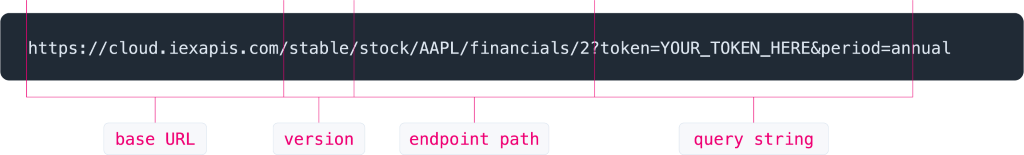    

Base url - it is the website's main url.<br><br>

version - for IEX api use stable for the most stable version of the API.

endpoint path - This is the path specific to each endpoint and depends on the data you would like to access. 
<br>examples - Balance Sheet: `/stock/{symbol}/balance-sheet/{last}/{field} `
<br>Quote(minute by minute price of a stock): `/stock/{symbol}/quote/{field}`<br>
The enclosed portions { } above are path parameters. When you make an API call, you need to replace the {parameter} with values. The values you use for the parameters help determine the data you’ll get back for the call.

Query string -parameters are how you can further filter or sort the data returned from an API call.The query string always begins with the question mark character “?” and comes last in a REST call. The query string is a series of parameters represented as “parameter=value.” Each qeury string must include your primary key as the token.The query string can take additional paramaters. 

There a plenty of endpoint paths available and different types of financial data which you could extract from IEX API. Please consider exploring the [documentation](https://iexcloud.io/docs/api/#api-reference) for full reference of the API and the all the possible requests that could be made.

## Creating your primary key.
As mentioned before you need a primary key to make requests to the API and extract data.To get a primary key head over to [IEX website](https://www.iexcloud.io/) and sign up. After signing in, go to API token on the left and there you can find your publishable primary key.

Import necessary packages

In [9]:
import pandas as pd
import requests

In [10]:
api_key = '' # put your own API key

Make a request to extract exxon mobil stock prices throughout the 2nd quarter of 2018. Note that that the end point to extract general stock price info is `stock/{symbol}/chart` the endpoint could take additional paramters such as the date range. If not specified the default is last month(extract the stock price throughout last month)

In [11]:
url =  f'https://cloud.iexapis.com/stable/stock/xom/chart/Q22018?token={api_key}'
xom_data = requests.get(url).json()

Any data received from an API will be in json format.Json format primarily means that the data is stored as key and value pairs. Let us explore the data received back and store this data as a dataframe

In [12]:
type(xom_data)


dict

In [13]:
len(xom_data)

1

In [14]:
type(xom_data[0])

KeyError: 0

The data returned is a list and has 64 elements, each element is a dictionary.Now let us take a look at the data.

In [ ]:
xom_data

In [ ]:
xom_data[0].keys()

We can see that each dict has these keys,one of them being the date.Therefore each element of the list represent financial data for one day and has the open price,close price,etc.We are mainly concerned with these values only ('close', 'high', 'low', 'open', 'symbol','date') and want to store this info in a dataframe.

In [ ]:
# accessing a single open price the first thing we access the element
# and then access the open price by passing in the key 'open'
xom_data[0]['open']

In [ ]:
# Initialise an empty dictionary with the keys that we are only concerned with.
# This dictionary will then be used to create our dataframe form it
dict_df = {'symbol':[],'open':[],'close':[],'date':[]}

In [ ]:
# In this loop each row represents an element of the list. 
# We access this element and then acces the desired info by passing in the key and appending this info to our dictionary.
for row in xom_data:
    dict_df['close'].append(row['close'])
    dict_df['open'].append(row['open'])
    dict_df['date'].append(row['date'])
    dict_df['symbol'].append(row['symbol'])

In [8]:
dict_df

NameError: name 'dict_df' is not defined

In [7]:
# create dataframe
df_xom = pd.DataFrame(dict_df)

NameError: name 'dict_df' is not defined

In [105]:
df_xom.head()

,symbol,open,close,date
0,XOM,74.27,73.22,2018-04-02
1,XOM,73.45,75.02,2018-04-03
2,XOM,74.05,74.87,2018-04-04
3,XOM,75.06,76.02,2018-04-05
4,XOM,75.64,74.87,2018-04-06


Now consider that we want to extract financial data for multiple stocks. The endpoint is `stock/market/batch` and then in the query string you could specify what exactly you want.

In [106]:
stocks = ['xom','tsla','gme']
url_batch = f'https://cloud.iexapis.com/stable/stock/market/batch?symbols={stocks}&types=chart&range=Q22020&token={api_key}'
batch = requests.get(url_batch).json()

Let us now examine the data we received back 

In [107]:
type(batch)

dict

In [108]:
batch.keys()

dict_keys(['XOM', 'TSLA', 'GME'])

In [114]:
type(batch['XOM']),batch['XOM'].keys()

(dict, dict_keys(['chart']))

In [110]:
type(batch['XOM']['chart']),len(batch['XOM']['chart'])

(list, 63)

In [119]:
type(batch['XOM']['chart'][0]),batch['XOM']['chart'][0].keys()

(dict,
 dict_keys(['close', 'high', 'low', 'open', 'symbol', 'volume', 'id', 'key', 'subkey', 'date', 'updated', 'changeOverTime', 'marketChangeOverTime', 'uOpen', 'uClose', 'uHigh', 'uLow', 'uVolume', 'fOpen', 'fClose', 'fHigh', 'fLow', 'fVolume', 'label', 'change', 'changePercent']))

In this data recieved we got back a dictionary with three keys which was our stock symbols we asked for (XOM,TSLA,GME) each stock(key) has a dictionary with the key chart(which was the type of financail data we specified in the url).The chart of each stock has a list with each element being a dictionary holding the data (similar to the first API call we made).

In [120]:
batch

{'XOM': {'chart': [{'close': 37.53,
    'high': 38.7,
    'low': 36.34,
    'open': 36.86,
    'symbol': 'XOM',
    'volume': 36045930,
    'id': 'HISTORICAL_PRICES',
    'key': 'XOM',
    'subkey': '',
    'date': '2020-04-01',
    'updated': 1636561413000,
    'changeOverTime': 0,
    'marketChangeOverTime': 0,
    'uOpen': 36.86,
    'uClose': 37.53,
    'uHigh': 38.7,
    'uLow': 36.34,
    'uVolume': 36045930,
    'fOpen': 32.6183,
    'fClose': 33.2112,
    'fHigh': 34.2465,
    'fLow': 32.1581,
    'fVolume': 36045930,
    'label': 'Apr 1, 20',
    'change': 0,
    'changePercent': 0},
   {'close': 40.4,
    'high': 41.96,
    'low': 37.9,
    'open': 38.74,
    'symbol': 'XOM',
    'volume': 62000162,
    'id': 'HISTORICAL_PRICES',
    'key': 'XOM',
    'subkey': '',
    'date': '2020-04-02',
    'updated': 1636561413000,
    'changeOverTime': 0.07647215560884618,
    'marketChangeOverTime': 0.07647215560884618,
    'uOpen': 38.74,
    'uClose': 40.4,
    'uHigh': 41.96,
    'u

Now our goal again is to convert this data into a dataframe with the same features as the first API call.

In [121]:
# Now consider we want to access the closing price of tesla stock of the very first day of the quarter.
batch['TSLA']['chart'][0]['close']

96.312

In the example above to access the financail data of any symbol we will first pass the key to access the data of this stock and from there the process is the same as the first api call.We access the chart data and access a specific row by inexing the list and then access our desired data by passing in the key.

In [143]:
dict_batch = {'symbol':[],'open':[],'close':[],'date':[]}

In [144]:
# we first access each symbol by accessing the keys in the data recieved
for symbol in batch.keys():
    # we then loop over each element in the chart of the symbol and plug in the data into the dictionary
    for row in batch[symbol]['chart']:
        dict_batch['close'].append(row['close'])
        dict_batch['open'].append(row['open'])
        dict_batch['date'].append(row['date'])
        dict_batch['symbol'].append(row['symbol'])

In [145]:
dict_batch

{'symbol': ['XOM',
  'XOM',
  'XOM',
  'XOM',
  'XOM',
  'XOM',
  'XOM',
  'XOM',
  'XOM',
  'XOM',
  'XOM',
  'XOM',
  'XOM',
  'XOM',
  'XOM',
  'XOM',
  'XOM',
  'XOM',
  'XOM',
  'XOM',
  'XOM',
  'XOM',
  'XOM',
  'XOM',
  'XOM',
  'XOM',
  'XOM',
  'XOM',
  'XOM',
  'XOM',
  'XOM',
  'XOM',
  'XOM',
  'XOM',
  'XOM',
  'XOM',
  'XOM',
  'XOM',
  'XOM',
  'XOM',
  'XOM',
  'XOM',
  'XOM',
  'XOM',
  'XOM',
  'XOM',
  'XOM',
  'XOM',
  'XOM',
  'XOM',
  'XOM',
  'XOM',
  'XOM',
  'XOM',
  'XOM',
  'XOM',
  'XOM',
  'XOM',
  'XOM',
  'XOM',
  'XOM',
  'XOM',
  'XOM',
  'TSLA',
  'TSLA',
  'TSLA',
  'TSLA',
  'TSLA',
  'TSLA',
  'TSLA',
  'TSLA',
  'TSLA',
  'TSLA',
  'TSLA',
  'TSLA',
  'TSLA',
  'TSLA',
  'TSLA',
  'TSLA',
  'TSLA',
  'TSLA',
  'TSLA',
  'TSLA',
  'TSLA',
  'TSLA',
  'TSLA',
  'TSLA',
  'TSLA',
  'TSLA',
  'TSLA',
  'TSLA',
  'TSLA',
  'TSLA',
  'TSLA',
  'TSLA',
  'TSLA',
  'TSLA',
  'TSLA',
  'TSLA',
  'TSLA',
  'TSLA',
  'TSLA',
  'TSLA',
  'TSLA',
  'TSLA',
  '

In [146]:
df_batch = pd.DataFrame(dict_batch)

In [147]:
df_batch['symbol'].nunique()

3

We do indeed have three different stock in our dataframe

In [148]:
df_batch.head()

,symbol,open,close,date
0,XOM,36.86,37.53,2020-04-01
1,XOM,38.74,40.40,2020-04-02
2,XOM,41.45,39.21,2020-04-03
3,XOM,39.88,40.47,2020-04-06
4,XOM,42.90,41.24,2020-04-07


Finally let us get general information about each of these companies and add it to our dataframe.We will make the same api call but specify company instead of chart.

In [123]:
url_company = f'https://cloud.iexapis.com/stable/stock/market/batch?symbols={stocks}&types=company&token={api_key}'
company_info = requests.get(url_company).json()

Examine the data received 

In [158]:
type(company_info),company_info.keys()

(dict, dict_keys(['XOM', 'TSLA', 'GME']))

In [160]:
type(company_info['XOM']),company_info['XOM'].keys()

(dict, dict_keys(['company']))

In [162]:
type(company_info['XOM']['company']),company_info['XOM']['company'].keys()

(dict,
 dict_keys(['symbol', 'companyName', 'exchange', 'industry', 'website', 'description', 'CEO', 'securityName', 'issueType', 'sector', 'primarySicCode', 'employees', 'tags', 'address', 'address2', 'state', 'city', 'zip', 'country', 'phone']))

We can see that the structure of data received back is the same as the previous API call with the exception that company info is held in a single dictionary unlike the chart where it was store in a list of dictionaries.

In [163]:
company_info

{'XOM': {'company': {'symbol': 'XOM',
   'companyName': 'Exxon Mobil Corp.',
   'exchange': 'NEW YORK STOCK EXCHANGE INC.',
   'industry': 'Petroleum Refineries',
   'website': 'www.exxonmobil.com',
   'description': "ExxonMobil, one of the largest publicly traded international energy companies, uses technology and innovation to help meet the world's growing energy needs. ExxonMobil holds an industry-leading inventory of resources, is one of the largest refiners and marketers of petroleum products, and its chemical company is one of the largest in the world.",
   'CEO': 'Darren Woods',
   'securityName': 'Exxon Mobil Corp.',
   'issueType': 'cs',
   'sector': 'Manufacturing',
   'primarySicCode': 2911,
   'employees': 2018,
   'tags': ['Energy Minerals',
    'Integrated Oil',
    'Manufacturing',
    'Petroleum Refineries'],
   'address': '5959 Las Colinas Blvd',
   'address2': None,
   'state': 'Texas',
   'city': 'Irving',
   'zip': '75039-2298',
   'country': 'US',
   'phone': '1972

In [164]:
#consider we want to get the industry of TSLA
company_info['TSLA']['company']['industry']

'Automobile Manufacturing '

In [150]:
info = {'companyName':[],'exchange':[],'industry':[],'symbol':[]}

In [151]:
# we access each symbol by accessing the keys in the data recieved
for symbol in company_info.keys():
    info['companyName'].append(company_info[symbol]['company']['companyName'])
    info['exchange'].append(company_info[symbol]['company']['exchange'])
    info['industry'].append(company_info[symbol]['company']['industry'])
    info['symbol'].append(company_info[symbol]['company']['symbol'])

Note that we did not need an inner loop as the information of the company is stored in one dictionary

In [152]:
info

{'companyName': ['Exxon Mobil Corp.', 'Tesla Inc', 'Gamestop Corporation'],
 'exchange': ['NEW YORK STOCK EXCHANGE INC.',
  'NASDAQ',
  'NEW YORK STOCK EXCHANGE INC.'],
 'industry': ['Petroleum Refineries',
  'Automobile Manufacturing ',
  'Electronics Stores '],
 'symbol': ['XOM', 'TSLA', 'GME']}

In [153]:
comps = pd.DataFrame(info)

In [154]:
comps.head()

,companyName,exchange,industry,symbol
0,Exxon Mobil Corp.,NEW YORK STOCK EXCHANGE INC.,Petroleum Refineries,XOM
1,Tesla Inc,NASDAQ,Automobile Manufacturing,TSLA
2,Gamestop Corporation,NEW YORK STOCK EXCHANGE INC.,Electronics Stores,GME


We can join both dataframes using pandas method merge.

In [156]:
df = pd.merge(df_batch,comps,on='symbol')

In [157]:
df.head()

,symbol,open,close,date,companyName,exchange,industry
0,XOM,36.86,37.53,2020-04-01,Exxon Mobil Corp.,NEW YORK STOCK EXCHANGE INC.,Petroleum Refineries
1,XOM,38.74,40.40,2020-04-02,Exxon Mobil Corp.,NEW YORK STOCK EXCHANGE INC.,Petroleum Refineries
2,XOM,41.45,39.21,2020-04-03,Exxon Mobil Corp.,NEW YORK STOCK EXCHANGE INC.,Petroleum Refineries
3,XOM,39.88,40.47,2020-04-06,Exxon Mobil Corp.,NEW YORK STOCK EXCHANGE INC.,Petroleum Refineries
4,XOM,42.90,41.24,2020-04-07,Exxon Mobil Corp.,NEW YORK STOCK EXCHANGE INC.,Petroleum Refineries
